## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [4]:
pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/46/0f/7bd55361168bb32796b360ad15a25de6966c9c1beb58a8e30c01c8279862/tensorflow-2.0.0-cp36-cp36m-manylinux2010_x86_64.whl


In [5]:
import tensorflow
tensorflow.__version__

'2.0.0'

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # importing the fashion_mnist dataset 

### Find no.of samples are there in training and test datasets

In [7]:
print (y_train.shape)
print (y_test.shape)


(60000,)
(10000,)


### Find dimensions of an image in the dataset

In [8]:
x_train[5].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10) 
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [0]:
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [12]:
# already done in previous step.
# for example-
x_train[9].shape

(28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Convolution2D, MaxPooling2D


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
model=tensorflow.keras.models.Sequential()
model.add(Convolution2D(32,3,3,input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Convolution2D(32,3,3))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]


In [23]:
model.fit(x_train, y_train, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.5028 - accuracy: 0.8201 - val_loss: 0.4127 - val_accuracy: 0.8462
Epoch 2/10
60000/60000 [==============================] - 12s 204us/sample - loss: 0.3542 - accuracy: 0.8713 - val_loss: 0.3461 - val_accuracy: 0.8762
Epoch 3/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.3131 - accuracy: 0.8844 - val_loss: 0.3315 - val_accuracy: 0.8762
Epoch 4/10
60000/60000 [==============================] - 12s 205us/sample - loss: 0.2834 - accuracy: 0.8947 - val_loss: 0.3136 - val_accuracy: 0.8843
Epoch 5/10
60000/60000 [==============================] - 12s 192us/sample - loss: 0.2618 - accuracy: 0.9029 - val_loss: 0.2929 - val_accuracy: 0.8927
Epoch 6/10
60000/60000 [==============================] - 12s 207us/sample - loss: 0.2449 - accuracy: 0.9085 - val_loss: 0.3010 - val_accuracy: 0.8877
Epoch 7/10
60000/60000 [====================

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
model2=tensorflow.keras.models.Sequential()
model2.add(Convolution2D(32,3,3,input_shape=(28,28,1)))
model2.add(Activation('relu'))
model2.add(Convolution2D(32,3,3))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))

In [32]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]
model2.fit(x_train, y_train, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 185us/sample - loss: 0.8998 - accuracy: 0.6752 - val_loss: 0.6385 - val_accuracy: 0.7638
Epoch 2/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.6705 - accuracy: 0.7565 - val_loss: 0.5760 - val_accuracy: 0.7876
Epoch 3/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.6156 - accuracy: 0.7747 - val_loss: 0.5480 - val_accuracy: 0.7956
Epoch 4/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.5837 - accuracy: 0.7864 - val_loss: 0.5373 - val_accuracy: 0.7999
Epoch 5/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.5652 - accuracy: 0.7936 - val_loss: 0.5113 - val_accuracy: 0.8143
Epoch 6/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.5502 - accuracy: 0.7975 - val_loss: 0.5076 - val_accuracy: 0.8148
Epoch 7/10
60000/60000 [====================

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False, 
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=50,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=False, 
    vertical_flip=False)  


datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

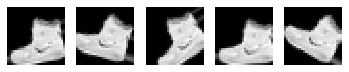

In [37]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [46]:
model2.fit_generator(datagen.flow(x_train, y_train, batch_size=32),epochs=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
1875/1875 [==============================] - 86s 46ms/step - loss: 1.4445 - accuracy: 0.4575 - val_loss: 0.8917 - val_accuracy: 0.6728
Epoch 2/10
1875/1875 [==============================] - 83s 44ms/step - loss: 1.2807 - accuracy: 0.5166 - val_loss: 0.9234 - val_accuracy: 0.6484
Epoch 3/10
1875/1875 [==============================] - 85s 45ms/step - loss: 1.2106 - accuracy: 0.5432 - val_loss: 0.8675 - val_accuracy: 0.6708
Epoch 4/10
1875/1875 [==============================] - 82s 44ms/step - loss: 1.1793 - accuracy: 0.5567 - val_loss: 0.8613 - val_accuracy: 0.6754
Epoch 5/10
1875/1875 [==============================] - 82s 44ms/step - loss: 1.1427 - accuracy: 0.5716 - val_loss: 0.8985 - val_accuracy: 0.6683
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 1.1245 - accuracy: 0.5799 - val_loss: 0.8921 - val_accuracy: 0.6658
Epoch 7/10
1875/1875 [==============================] - 82s 44ms/step - loss: 1.1089 - accuracy: 0.5854 - val_loss: 0.8886 -

###  Report the final train and validation accuracy

In [0]:
#training accuracies after running through data generator for 10 epochs= 60%

In [0]:
# validation/testing accuracy after running through data generator for 10 epochs  =67%

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [64]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator( 
    rotation_range=100,  
    width_shift_range=0.1,
    height_shift_range=0.1, 
    horizontal_flip=True,  
    vertical_flip=False)  


### **Prepare/fit the generator.**

In [0]:
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

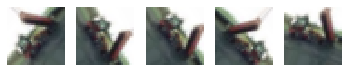

In [70]:
gen = datagen.flow(x_train[2:3], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype('uint8'), cmap='gray')
    plt.plot()
plt.show()